# LETS GROW MORE

# NAME=AMLAN TRIPATHY

# DATA Science Intern

# Iris Flower Classification M.L Project

# Description:
This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Importing Datasets

In [5]:
table=pd.read_csv("Iris.csv")


In [6]:
table.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Deleting The Column Containing Serial-Numbers

In [7]:
table=table.drop(columns="Id")


# Describing the Features of Table in Brief

In [8]:
table.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Checking For Null Values in Dataset 

In [9]:
empty=table.isnull()
print(empty)
table.isnull().sum()

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            False         False          False         False    False
1            False         False          False         False    False
2            False         False          False         False    False
3            False         False          False         False    False
4            False         False          False         False    False
..             ...           ...            ...           ...      ...
145          False         False          False         False    False
146          False         False          False         False    False
147          False         False          False         False    False
148          False         False          False         False    False
149          False         False          False         False    False

[150 rows x 5 columns]


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Plotting Histograms Of The Features Of Data-Set

<AxesSubplot:>

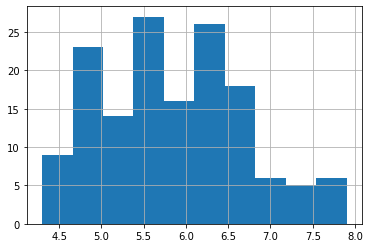

In [10]:
table["SepalLengthCm"].hist()

<AxesSubplot:>

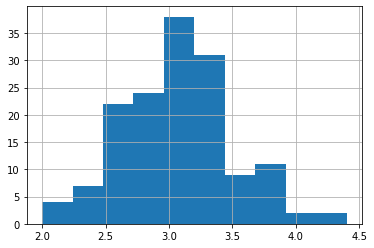

In [11]:
table["SepalWidthCm"].hist()

<AxesSubplot:>

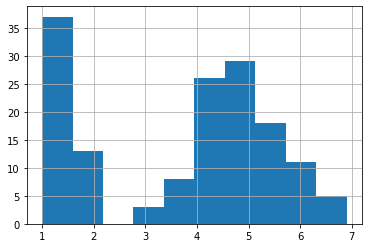

In [12]:
table["PetalLengthCm"].hist()

<AxesSubplot:>

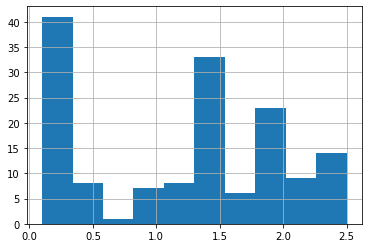

In [13]:
table["PetalWidthCm"].hist()

# Checking for the Unique Values Of Features in Data-Set

In [14]:
#checking the relation between dependencies(using Scatter Plot) for distiguishing between diff. species
colours=["red","yellow","green"]
x=len(table["Species"].unique())
species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
print(x)

3


# Scatter Plots

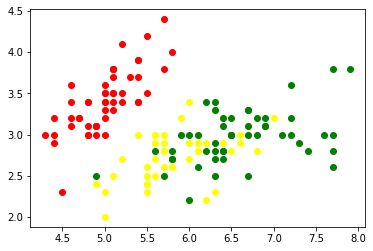

In [15]:
#SCATTER PLOT BETWEEN SEPAL LENGTH AND SEPAL WIDTH
for i in range(x):
    duo=table[table["Species"]==species[i]]
    plt.scatter(duo["SepalLengthCm"],duo["SepalWidthCm"],c=colours[i],label=species[i])
  

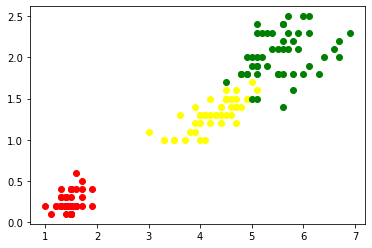

In [16]:
#SCATTER PLOT BETWEEN PETAL LENGTH AND PETAL WIDTH
for i in range(x):
    duo=table[table["Species"]==species[i]]
    plt.scatter(duo["PetalLengthCm"],duo["PetalWidthCm"],c=colours[i],label=species[i])
                                                                                    

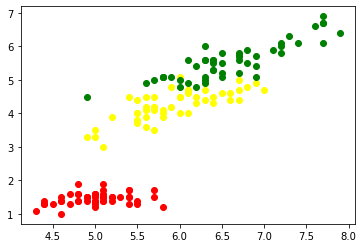

In [17]:
#SCATTER PLOT BETWEEN SepaL LENGTH AND PETAL Length
for i in range(x):
    duo=table[table["Species"]==species[i]]
    plt.scatter(duo["SepalLengthCm"],duo["PetalLengthCm"],c=colours[i],label=species[i])

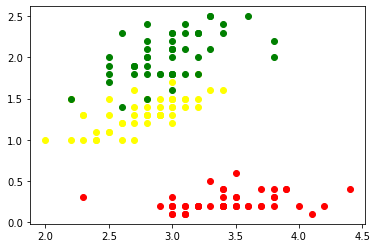

In [18]:
#SCATTER PLOT BETWEEN SepaL Width AND PETAL Width
for i in range(x):
    duo=table[table["Species"]==species[i]]
    plt.scatter(duo["SepalWidthCm"],duo["PetalWidthCm"],c=colours[i],label=species[i])

#Correlation Among Features

In [19]:
#checking the correlation between different columns
table.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [20]:
table.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
table['Species'] = le.fit_transform(table['Species'])
table.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Splitting The Data

In [34]:
#Now The Main Part Of the Model.
#Training the Model By Splitting It in 7:3 ratio i.e,
# train - 70
# test - 30
from sklearn.model_selection import train_test_split

X = table.drop(columns=['Species'])
Y = table['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

# Regression Model

In [35]:
# 1st Model On logistic Regression 
from sklearn.linear_model import LogisticRegression
First_Model = LogisticRegression()

# Model Training
First_Model.fit(x_train, y_train)

print("Prediction: ",First_Model.score(x_test, y_test) )





Prediction:  0.9555555555555556


# Decision Tree Model

In [36]:
#2 Decision Tree
from sklearn.tree import DecisionTreeClassifier
Second_Model = DecisionTreeClassifier()

#Model Training
Second_Model.fit(x_train, y_train)

print("Prediction: ",Second_Model.score(x_test, y_test) )

Prediction:  0.9333333333333333
